Delta-X Workshop

Sediment Accretion Using Feldspar:
https://daac.ornl.gov/DELTAX/guides/DeltaX_Feldspar_Sediment.html

Twilley, R., A. Fontenot-Cassaway, and A. Rovai. 2021. Delta-X: Feldspar Sediment Accretion Measurements for Coastal Wetlands, MRD, LA, USA. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1998

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

field_path = os.getcwd()


In [21]:
##PC
sed_file = pd.read_csv(field_path + "\DeltaX_Feldspar_Sediment_1998\data\DeltaX_Feldspar_Fall2020_Spring2021.csv")
##MAC
#sed_file = pd.read_csv(field_path + "\DeltaX_Feldspar_Sediment_1998\data\DeltaX_Feldspar_Fall2020_Spring2021.csv")

sed_file = sed_file.replace('not collected',np.nan)

sed_file = sed_file.astype({'elevation_navd88':'float','normalized_accretion':'float','soil_bulk_density':'float','soil_organic_matter_content':'float','soil_organic_carbon':'float','soil_organic_carbon_density':'float'})

sed_file.head()

,basin,campaign,site_id,hydrogeomorphic_zone,elevation_navd88,latitude,longitude,station,plot,replicate,...,time_marker_deployed,time_marker_sampled,sediment_accretion,days_between_sampling_and_deployment,normalized_accretion,soil_bulk_density,soil_organic_matter_content,soil_organic_carbon,soil_organic_carbon_density,Unnamed: 20
0,Atchafalaya,Fall_2020,CRMS_2568,supratidal,0.554,29.564256,-91.354892,T25,X,A,...,10/17/2019 12:00,11/10/2020 12:00,11,390,10.0,0.037,NaN,NaN,NaN,NaN
1,Atchafalaya,Fall_2020,CRMS_2568,supratidal,0.554,29.564256,-91.354892,T25,X,B,...,10/17/2019 12:00,11/10/2020 12:00,7,390,7.0,0.073,NaN,NaN,NaN,NaN
2,Atchafalaya,Fall_2020,CRMS_2568,supratidal,0.554,29.564256,-91.354892,T25,Y,A,...,10/17/2019 12:00,11/10/2020 12:00,12,390,11.0,0.047,NaN,NaN,NaN,NaN
3,Atchafalaya,Fall_2020,CRMS_2568,supratidal,0.554,29.564256,-91.354892,T25,Y,B,...,10/17/2019 12:00,11/10/2020 12:00,10,390,9.0,0.069,NaN,NaN,NaN,NaN
4,Atchafalaya,Fall_2020,CRMS_2568,supratidal,0.554,29.564256,-91.354892,T25,Z,A,...,10/17/2019 12:00,11/10/2020 12:00,14,390,13.0,0.026,NaN,NaN,NaN,NaN


In [23]:
sed_means = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.nanmean)
sed_stds = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.std)
sed_count = sed_file.groupby(['site_id','hydrogeomorphic_zone'])[['elevation_navd88','normalized_accretion','soil_bulk_density','soil_organic_matter_content','soil_organic_carbon','soil_organic_carbon_density']].agg(np.count_nonzero)

sed_means

elevation_navd88  normalized_accretion  \
site_id   hydrogeomorphic_zone                                           
CRMS_0294 intertidal                    0.254500             19.900000   
CRMS_0322 intertidal                    0.131500             14.708333   
CRMS_0396 intertidal                    0.095000             15.960000   
          subtidal                           NaN             98.714286   
CRMS_0399 intertidal                    0.189000             13.041667   
          subtidal                           NaN             41.750000   
CRMS_0421 intertidal                    0.009760             31.480000   
          subtidal                           NaN             41.923077   
CRMS_2568 supratidal                    0.442000             21.000000   
WLD_T1    subtidal                     -0.110357             51.357143   
          supratidal                    0.482000             40.333333   
WLD_T3    intertidal                    0.249000             93.733333   
          subtidal                     -0.230182             39.772727   

                                soil_bulk_density  \
site_id   hydrogeomorphic_zone                      
CRMS_0294 intertidal                     0.031633   
CRMS_0322 intertidal                     0.185625   
CRMS_0396 intertidal                     0.080040   
          subtidal                       0.104286   
CRMS_0399 intertidal                     0.270667   
          subtidal                       0.125182   
CRMS_0421 intertidal                     0.150840   
          subtidal                       0.189846   
CRMS_2568 supratidal                     0.053556   
WLD_T1    subtidal                       0.273107   
          supratidal                     0.574467   
WLD_T3    intertidal                     0.655467   
          subtidal                       0.770591   

                                soil_organic_matter_content  \
site_id   hydrogeomorphic_zone                                
CRMS_0294 intertidal                              73.113333   
CRMS_0322 intertidal                              33.066667   
CRMS_0396 intertidal                              40.236000   
          subtidal                                      NaN   
CRMS_0399 intertidal                              24.208333   
          subtidal                                      NaN   
CRMS_0421 intertidal                              23.120000   
          subtidal                                      NaN   
CRMS_2568 supratidal                                    NaN   
WLD_T1    subtidal                                 8.564286   
          supratidal                              10.560000   
WLD_T3    intertidal                               6.900000   
          subtidal                                 4.754545   

                                soil_organic_carbon  \
site_id   hydrogeomorphic_zone                        
CRMS_0294 intertidal                      35.893333   
CRMS_0322 intertidal                      13.566667   
CRMS_0396 intertidal                      17.528000   
          subtidal                              NaN   
CRMS_0399 intertidal                       9.466667   
          subtidal                              NaN   
CRMS_0421 intertidal                       8.920000   
          subtidal                              NaN   
CRMS_2568 supratidal                            NaN   
WLD_T1    subtidal                         2.603571   
          supratidal                       3.460000   
WLD_T3    intertidal                       1.593333   
          subtidal                         1.072727   

                                soil_organic_carbon_density  
site_id   hydrogeomorphic_zone                               
CRMS_0294 intertidal                               0.011400  
CRMS_0322 intertidal                               0.024125  
CRMS_0396 intertidal                               0.012640  
          subtidal                         

C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


[Text(0.5, 0, 'Site'),
 Text(0, 0.5, 'Soil Organic Matter (% dry mass)'),
 (0.0, 100.0)]

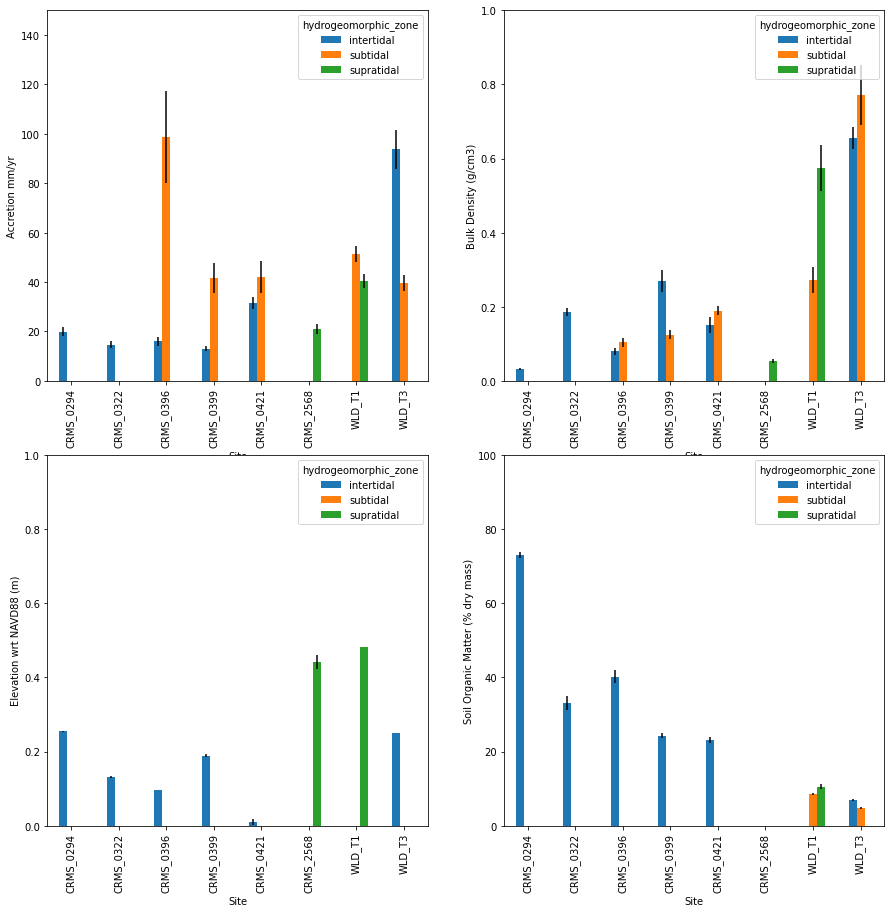

In [36]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,15))
sed_means.unstack()['normalized_accretion'].plot(kind='bar', stacked=False,ax = ax1,yerr = sed_stds.unstack()['normalized_accretion']/(np.sqrt(sed_count.unstack()['normalized_accretion'])))
ax1.set(xlabel='Site', ylabel='Accretion mm/yr',ylim=[0,150])

sed_means.unstack()['soil_bulk_density'].plot(kind='bar', stacked=False,ax = ax2,yerr = sed_stds.unstack()['soil_bulk_density']/(np.sqrt(sed_count.unstack()['soil_bulk_density'])))
ax2.set(xlabel='Site', ylabel='Bulk Density (g/cm3)',ylim=[0,1])

sed_means.unstack()['elevation_navd88'].plot(kind='bar', stacked=False,ax = ax3,yerr = sed_stds.unstack()['elevation_navd88']/(np.sqrt(sed_count.unstack()['elevation_navd88'])))
ax3.set(xlabel='Site', ylabel='Elevation wrt NAVD88 (m)',ylim=[0,1])

sed_means.unstack()['soil_organic_matter_content'].plot(kind='bar', stacked=False,ax = ax4,yerr = sed_stds.unstack()['soil_organic_matter_content']/(np.sqrt(sed_count.unstack()['soil_organic_matter_content'])))
ax4.set(xlabel='Site', ylabel='Soil Organic Matter (% dry mass)',ylim=[0,100])

